**оценка классификатора**


Евгений Борисов <esborisov@sevsu.ru>


---

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## строим датасет

In [2]:
from sklearn.datasets import make_moons

n_samples=800
X,y = make_moons(n_samples=n_samples, noise=.2)
X.shape, y.shape

((800, 2), (800,))

## выделяем тестовый набор

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.6)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((320, 2), (320,), (480, 2), (480,))

In [4]:
%xdel X
%xdel y

## рисуем датасет

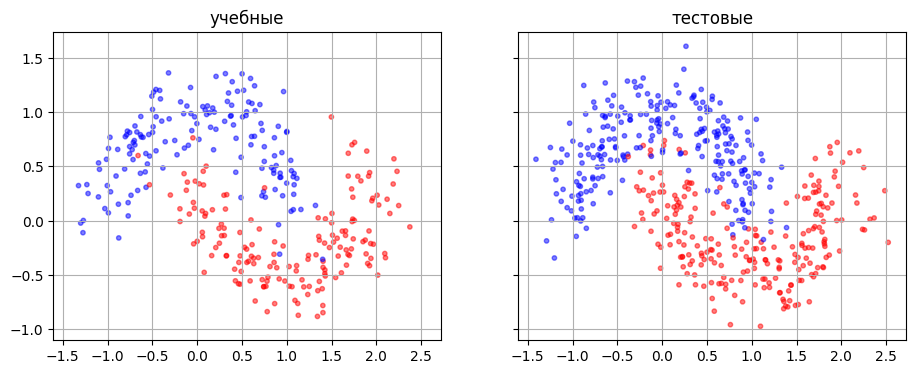

In [5]:
fig, ax = plt.subplots(1,2,sharey=True,sharex=True,figsize=(11,4),)
    
ax[0].set_title('учебные')
ax[0].scatter( x=X_train[:,0], y=X_train[:,1], c=[['b','r','g','y'][j] for j in y_train ], s=10, alpha=0.5 )
ax[0].grid()

ax[1].set_title('тестовые')
ax[1].scatter( x=X_test[:,0], y=X_test[:,1], c=[ ['b','r','g','y'][j] for j in y_test], s=10, alpha=0.5 )
ax[1].grid()

plt.show()

## обучаем клаcсификатор

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric='euclidean').fit(X_train,y_train)

## тестируем классификатор

In [7]:
predicted_score = model.predict_proba(X_test)
predicted_class = np.argmax(predicted_score,axis=1)

# predicted = (p[:,1]>0.5).astype(int)

### рисуем результат

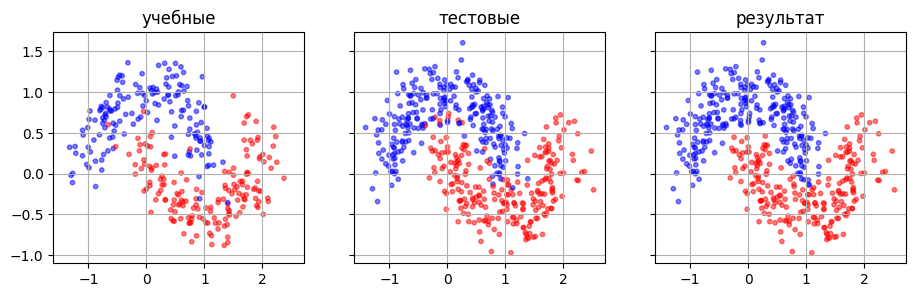

In [8]:
fig, ax = plt.subplots(1,3, sharey=True, sharex=True, figsize=(11,3),)
    
ax[0].set_title('учебные')
ax[0].scatter( x=X_train[:,0], y=X_train[:,1], c=[['b','r','g','y'][j] for j in y_train ], s=10, alpha=0.5 )
ax[0].grid()
ax[1].set_title('тестовые')
ax[1].scatter( x=X_test[:,0], y=X_test[:,1], c=[ ['b','r','g','y'][j] for j in y_test], s=10, alpha=0.5 )
ax[1].grid()
ax[2].set_title('результат')
ax[2].scatter( x=X_test[:,0], y=X_test[:,1], c=[ ['b','r','g','y'][j] for j in predicted_class], s=10, alpha=0.5 )
ax[2].grid()

plt.show()

### считаем метрики качества

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

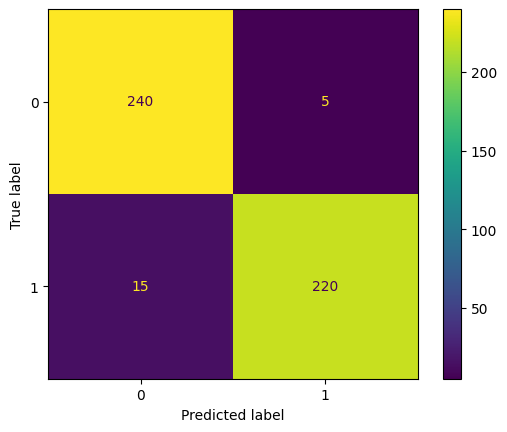

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(y_test, predicted_class), 
        # display_labels=classes
    ).plot()

In [10]:
from sklearn.metrics import classification_report

# таблица метрик качества классификации на тестовом наборе
print( classification_report(y_test,predicted_class) )

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       245
           1       0.98      0.94      0.96       235

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480



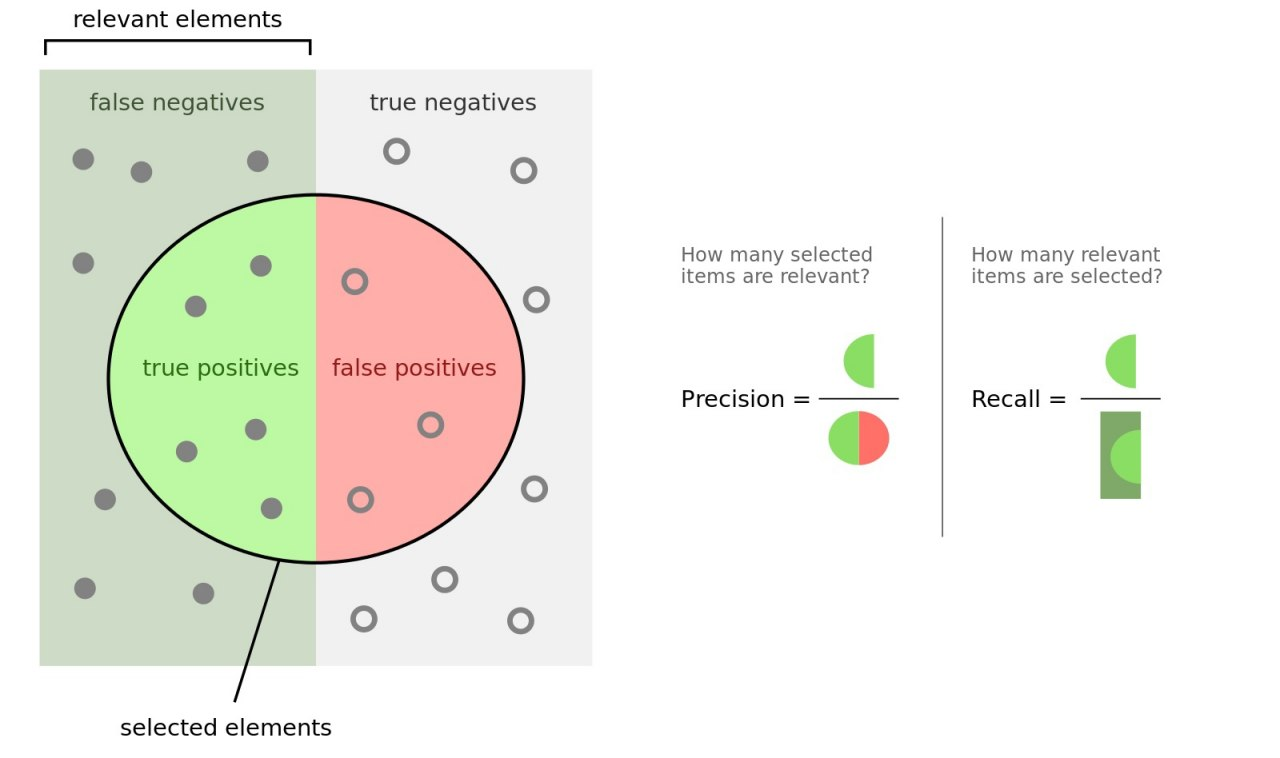

### рисуем ROC

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

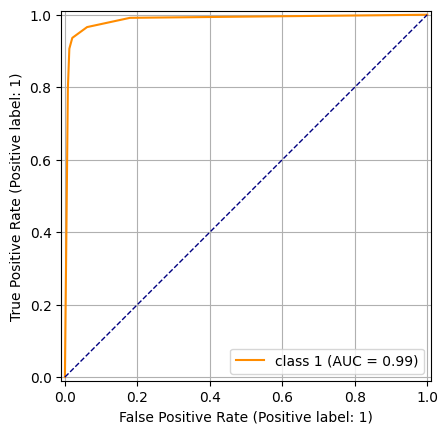

In [11]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions( y_test, predicted_score[:,1], name='class 1', color='darkorange', )
plt.plot([0,1],[0,1], color='navy', lw=1, linestyle='--')
plt.grid()

## визуализация результатов класификатора

((50, 50), (50, 50))

(2500, 2)

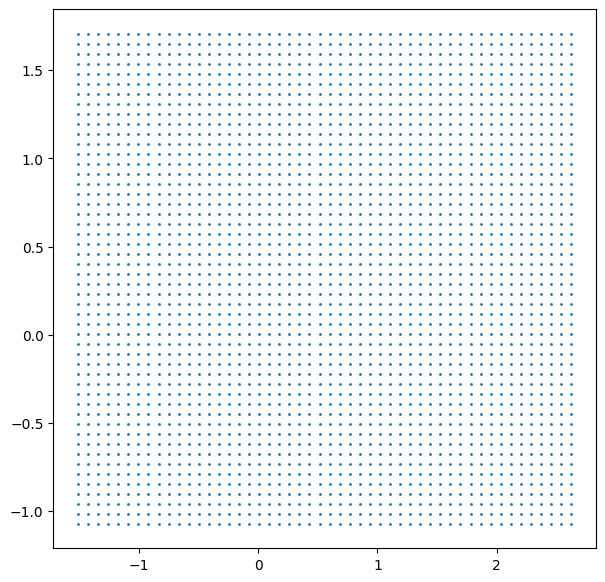

In [12]:
# строим сетку 

n = 50 # количество разбиений сетки

xx,yy = np.meshgrid(
    np.linspace( X_test[:,0].min()-0.1, X_test[:,0].max()+0.1, n), 
    np.linspace( X_test[:,1].min()-0.1, X_test[:,1].max()+0.1, n)
) # узлы сетки
display( ( xx.shape, yy.shape ) )

xy = np.vstack([xx.ravel(),yy.ravel() ]).T # разворачиваем сетку 
display( xy.shape )

plt.figure(figsize=(7,7))
plt.scatter( x=xy[:,0], y=xy[:,1], s=1 )
plt.show()

In [13]:
%%time 

predicted_xy = model.predict(xy).reshape(n,n) # вычисляем скор для каждого узла сетки

CPU times: user 103 ms, sys: 21.6 ms, total: 125 ms
Wall time: 78.2 ms


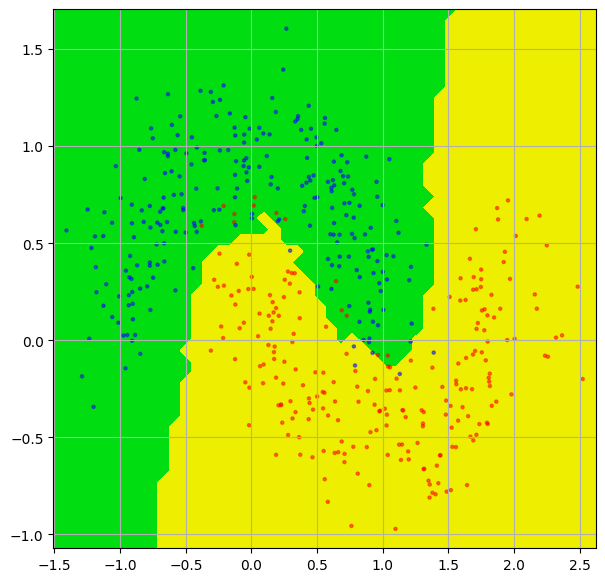

In [14]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(7,7))

plt.contourf(xx, yy, predicted_xy, cmap=ListedColormap(['#0d1','#ee0']))

c = [ ['b','r'][ label ] for label in y_test  ]
plt.scatter( x=X_test[:,0], y=X_test[:,1], c=c, alpha=.5, s=5 )

plt.grid()
plt.show()